# Context-free grammars

In [1]:
from tock import *

## Creating CFGs

You can create a CFG either by reading from a file (using `Grammar.from_file`) or a list of strings (using `Grammar.from_lines`). The first rule's left-hand side is assumed to be the start symbol.

In [2]:
g = Grammar.from_lines(["S -> a T b",
                        "S -> b",
                        "T -> T a",
                        "T -> &"])
g

In [3]:
g.nonterminals

{'S', 'T'}

A `Grammar` can be any unrestricted (type-0) grammar, but currently the grammar-reading functions can only read CFGs.

In [4]:
g.is_contextfree()

True

Like `RegularExpression` objects, there isn't a lot you can do with `Grammar` objects other than convert them to automata.

## From CFGs to PDAs

To convert to a PDA using a top-down construction, use the `from_grammar` function:

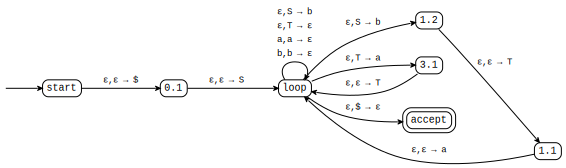

In [5]:
m = from_grammar(g)
to_graph(m)

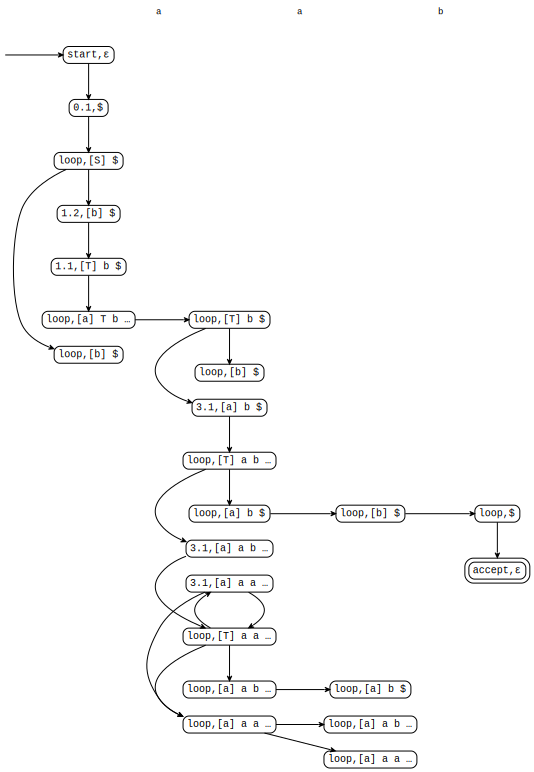

In [6]:
run(m, "a a b")

This diagram is a little hard to read, but one thing to note is the cycle between `loop` and `3.1`. This is caused by the left-recursive rule `T -> T a`, which the automaton applies an unbounded number of times.

There's also a bottom-up version:

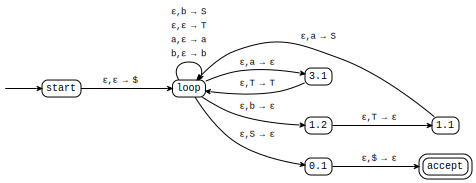

In [7]:
m = from_grammar(g, mode="bottomup")
to_graph(m)

## From CFGs to PDAs

The conversion in the reverse direction, from PDA to CFG, is actually related to the algorithm that Tock uses internally to simulate PDAs. We use the `remove_useless` method to reduce the size of the converted CFG.

In [9]:
m = read_csv('examples/sipser-2-14.csv')
to_grammar(m).remove_useless()